In [ ]:
import os
import numpy as np

input_dir = r"C:\Users\User\Downloads\class\114-1_電腦視覺\raw features"
output_dir = r"C:\Users\User\Downloads\class\114-1_電腦視覺\output_txt"

# 子資料夾名稱
norm_dir = os.path.join(output_dir, "normalized")
nonorm_dir = os.path.join(output_dir, "non_normalized")

os.makedirs(norm_dir, exist_ok=True)
os.makedirs(nonorm_dir, exist_ok=True)

# 讀取每個類別的 txt 檔案
for filename in os.listdir(input_dir):
    if not filename.endswith(".txt"):
        continue
    filepath = os.path.join(input_dir, filename)

    with open(filepath, 'r', encoding='utf-8') as f:
        lines = f.readlines()

    # 第一行通常是類別名稱
    class_name = lines[0].strip()
    feature_lines = lines[1:]

    # 解析特徵，假設每行最後幾欄是檔案路徑或其他非數值資訊
    features = []
    infos = []
    for line in feature_lines:
        parts = line.strip().split()
        # 數值部分假設前 478 欄
        feat = list(map(float, parts[:478]))
        info = parts[478:]  # 後面資訊保留
        features.append(feat)
        infos.append(info)

    features = np.array(features)  # shape = (201, 478)

    # ---------- 輸出非正規化 ----------
    nonorm_lines = []
    for feat, info in zip(features, infos):
        line = " ".join(map(str, feat)) + " " + " ".join(info)
        nonorm_lines.append(line)
    with open(os.path.join(nonorm_dir, filename), 'w', encoding='utf-8') as f:
        f.write(class_name + "\n")
        f.write("\n".join(nonorm_lines))

    # ---------- 輸出欄位正規化 (0-1 Min-Max) ----------
    # 對每一欄做正規化
    min_vals = features.min(axis=0)
    max_vals = features.max(axis=0)
    denom = max_vals - min_vals
    denom[denom == 0] = 1  # 避免除以零
    norm_features = (features - min_vals) / denom

    norm_lines = []
    for feat, info in zip(norm_features, infos):
        line = " ".join(map(str, feat)) + " " + " ".join(info)
        norm_lines.append(line)
    with open(os.path.join(norm_dir, filename), 'w', encoding='utf-8') as f:
        f.write(class_name + "\n")
        f.write("\n".join(norm_lines))

print("處理完成，已輸出非正規化與正規化版本")


In [ ]:
import os

normalized_dir = r"C:\Users\User\Downloads\class\114-1_電腦視覺\output_txt\normalized"
unformal_dir = r"C:\Users\User\Downloads\class\114-1_電腦視覺\output_txt\non_normalized"

output_normal = os.path.join(normalized_dir, "fnormal.txt")
output_unformal = os.path.join(unformal_dir, "unformal.txt")

def merge_txt(input_dir, output_file):
    files = sorted(os.listdir(input_dir))
    with open(output_file, "w", encoding="utf-8") as outfile:
        for fname in files:
            if not fname.endswith(".txt"):
                continue
            class_name = os.path.splitext(fname)[0]
            with open(os.path.join(input_dir, fname), "r", encoding="utf-8") as infile:
                lines = infile.readlines()
                for line in lines:
                    # 在每一行最後加上類別名稱
                    outfile.write(line.strip() + f" {class_name}\n")
    print(f"✅ 合併完成：{output_file}")

merge_txt(normalized_dir, output_normal)
merge_txt(unformal_dir, output_unformal)



評估正規化資料
載入正規化資料...
載入完成: 10050 張圖像

開始評估 (Top-10)...
總共 10050 張圖像

計算 cosine 相似度...
  完成！耗時: 0.63 秒
  開始評估準確率...
    進度: 500/10050 (5.0%)
    進度: 1000/10050 (10.0%)
    進度: 1500/10050 (14.9%)
    進度: 2000/10050 (19.9%)
    進度: 2500/10050 (24.9%)
    進度: 3000/10050 (29.9%)
    進度: 3500/10050 (34.8%)
    進度: 4000/10050 (39.8%)
    進度: 4500/10050 (44.8%)
    進度: 5000/10050 (49.8%)
    進度: 5500/10050 (54.7%)
    進度: 6000/10050 (59.7%)
    進度: 6500/10050 (64.7%)
    進度: 7000/10050 (69.7%)
    進度: 7500/10050 (74.6%)
    進度: 8000/10050 (79.6%)
    進度: 8500/10050 (84.6%)
    進度: 9000/10050 (89.6%)
    進度: 9500/10050 (94.5%)
    進度: 10000/10050 (99.5%)
  cosine 評估完成！

計算 euclidean 相似度...
  完成！耗時: 3.04 秒
  開始評估準確率...
    進度: 500/10050 (5.0%)
    進度: 1000/10050 (10.0%)
    進度: 1500/10050 (14.9%)
    進度: 2000/10050 (19.9%)
    進度: 2500/10050 (24.9%)
    進度: 3000/10050 (29.9%)
    進度: 3500/10050 (34.8%)
    進度: 4000/10050 (39.8%)
    進度: 4500/10050 (44.8%)
    進度: 5000/10050 (49.8%)
    進度: 5500/1

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


  完成！耗時: 1.56 秒
  開始評估準確率...
    進度: 500/10050 (5.0%)
    進度: 1000/10050 (10.0%)
    進度: 1500/10050 (14.9%)
    進度: 2000/10050 (19.9%)
    進度: 2500/10050 (24.9%)
    進度: 3000/10050 (29.9%)
    進度: 3500/10050 (34.8%)
    進度: 4000/10050 (39.8%)
    進度: 4500/10050 (44.8%)
    進度: 5000/10050 (49.8%)
    進度: 5500/10050 (54.7%)
    進度: 6000/10050 (59.7%)
    進度: 6500/10050 (64.7%)
    進度: 7000/10050 (69.7%)
    進度: 7500/10050 (74.6%)
    進度: 8000/10050 (79.6%)
    進度: 8500/10050 (84.6%)
    進度: 9000/10050 (89.6%)
    進度: 9500/10050 (94.5%)
    進度: 10000/10050 (99.5%)
  pcc 評估完成！

非正規化資料評估完成！總耗時: 9.77 秒

                                評估結果摘要                                
資料類型: 非正規化
總圖像數: 10050
類別數: 50
----------------------------------------------------------------------

方法                   平均準確率           標準差             最小值             最大值            
----------------------------------------------------------------------
cosine               0.2787          0.2950          0.0000      

C:\Users\User\AppData\Local\Temp\ipykernel_20956\1529645616.py:331: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(data_to_plot, labels=labels_to_plot, patch_artist=True)



圖表已儲存為: accuracy_comparison.png


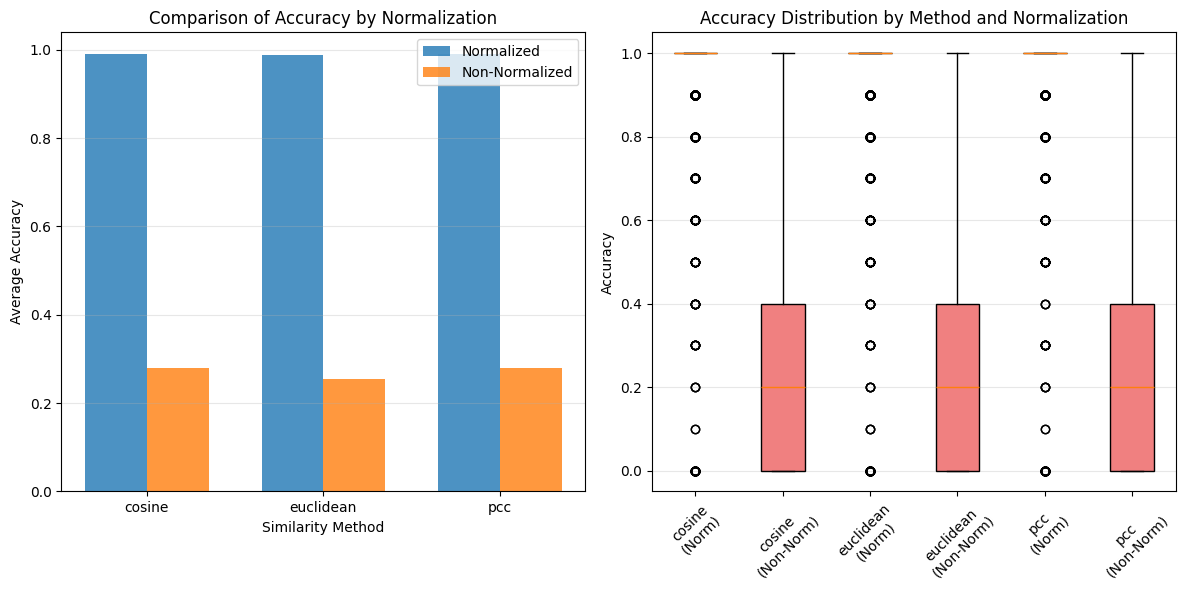


特徵重要性分析
載入正規化資料...
載入完成: 10050 張圖像

評估特徵: ColorStructure (維度: 32)

開始評估 (Top-10)...
總共 10050 張圖像

計算 cosine 相似度...
  完成！耗時: 0.40 秒
  開始評估準確率...
    進度: 500/10050 (5.0%)
    進度: 1000/10050 (10.0%)
    進度: 1500/10050 (14.9%)
    進度: 2000/10050 (19.9%)
    進度: 2500/10050 (24.9%)
    進度: 3000/10050 (29.9%)
    進度: 3500/10050 (34.8%)
    進度: 4000/10050 (39.8%)
    進度: 4500/10050 (44.8%)
    進度: 5000/10050 (49.8%)
    進度: 5500/10050 (54.7%)
    進度: 6000/10050 (59.7%)
    進度: 6500/10050 (64.7%)
    進度: 7000/10050 (69.7%)
    進度: 7500/10050 (74.6%)
    進度: 8000/10050 (79.6%)
    進度: 8500/10050 (84.6%)
    進度: 9000/10050 (89.6%)
    進度: 9500/10050 (94.5%)
    進度: 10000/10050 (99.5%)
  cosine 評估完成！

計算 euclidean 相似度...
  完成！耗時: 1.43 秒
  開始評估準確率...
    進度: 500/10050 (5.0%)
    進度: 1000/10050 (10.0%)
    進度: 1500/10050 (14.9%)
    進度: 2000/10050 (19.9%)
    進度: 2500/10050 (24.9%)
    進度: 3000/10050 (29.9%)
    進度: 3500/10050 (34.8%)
    進度: 4000/10050 (39.8%)
    進度: 4500/10050 (44.8%)
    進度: 50

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


  完成！耗時: 1.33 秒
  開始評估準確率...
    進度: 500/10050 (5.0%)
    進度: 1000/10050 (10.0%)
    進度: 1500/10050 (14.9%)
    進度: 2000/10050 (19.9%)
    進度: 2500/10050 (24.9%)
    進度: 3000/10050 (29.9%)
    進度: 3500/10050 (34.8%)
    進度: 4000/10050 (39.8%)
    進度: 4500/10050 (44.8%)
    進度: 5000/10050 (49.8%)
    進度: 5500/10050 (54.7%)
    進度: 6000/10050 (59.7%)
    進度: 6500/10050 (64.7%)
    進度: 7000/10050 (69.7%)
    進度: 7500/10050 (74.6%)
    進度: 8000/10050 (79.6%)
    進度: 8500/10050 (84.6%)
    進度: 9000/10050 (89.6%)
    進度: 9500/10050 (94.5%)
    進度: 10000/10050 (99.5%)
  pcc 評估完成！

評估特徵: ColorLayout (維度: 12)

開始評估 (Top-10)...
總共 10050 張圖像

計算 cosine 相似度...
  完成！耗時: 0.41 秒
  開始評估準確率...
    進度: 500/10050 (5.0%)
    進度: 1000/10050 (10.0%)
    進度: 1500/10050 (14.9%)
    進度: 2000/10050 (19.9%)
    進度: 2500/10050 (24.9%)
    進度: 3000/10050 (29.9%)
    進度: 3500/10050 (34.8%)
    進度: 4000/10050 (39.8%)
    進度: 4500/10050 (44.8%)
    進度: 5000/10050 (49.8%)
    進度: 5500/10050 (54.7%)
    進度: 6000/10050 

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


  完成！耗時: 1.31 秒
  開始評估準確率...
    進度: 500/10050 (5.0%)
    進度: 1000/10050 (10.0%)
    進度: 1500/10050 (14.9%)
    進度: 2000/10050 (19.9%)
    進度: 2500/10050 (24.9%)
    進度: 3000/10050 (29.9%)
    進度: 3500/10050 (34.8%)
    進度: 4000/10050 (39.8%)
    進度: 4500/10050 (44.8%)
    進度: 5000/10050 (49.8%)
    進度: 5500/10050 (54.7%)
    進度: 6000/10050 (59.7%)
    進度: 6500/10050 (64.7%)
    進度: 7000/10050 (69.7%)
    進度: 7500/10050 (74.6%)
    進度: 8000/10050 (79.6%)
    進度: 8500/10050 (84.6%)
    進度: 9000/10050 (89.6%)
    進度: 9500/10050 (94.5%)
    進度: 10000/10050 (99.5%)
  pcc 評估完成！

評估特徵: RegionShape (維度: 36)

開始評估 (Top-10)...
總共 10050 張圖像

計算 cosine 相似度...
  完成！耗時: 0.47 秒
  開始評估準確率...
    進度: 500/10050 (5.0%)
    進度: 1000/10050 (10.0%)
    進度: 1500/10050 (14.9%)
    進度: 2000/10050 (19.9%)
    進度: 2500/10050 (24.9%)
    進度: 3000/10050 (29.9%)
    進度: 3500/10050 (34.8%)
    進度: 4000/10050 (39.8%)
    進度: 4500/10050 (44.8%)
    進度: 5000/10050 (49.8%)
    進度: 5500/10050 (54.7%)
    進度: 6000/10050 

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


  完成！耗時: 1.51 秒
  開始評估準確率...
    進度: 500/10050 (5.0%)
    進度: 1000/10050 (10.0%)
    進度: 1500/10050 (14.9%)
    進度: 2000/10050 (19.9%)
    進度: 2500/10050 (24.9%)
    進度: 3000/10050 (29.9%)
    進度: 3500/10050 (34.8%)
    進度: 4000/10050 (39.8%)
    進度: 4500/10050 (44.8%)
    進度: 5000/10050 (49.8%)
    進度: 5500/10050 (54.7%)
    進度: 6000/10050 (59.7%)
    進度: 6500/10050 (64.7%)
    進度: 7000/10050 (69.7%)
    進度: 7500/10050 (74.6%)
    進度: 8000/10050 (79.6%)
    進度: 8500/10050 (84.6%)
    進度: 9000/10050 (89.6%)
    進度: 9500/10050 (94.5%)
    進度: 10000/10050 (99.5%)
  pcc 評估完成！

評估特徵: HomogeneousTexture (維度: 62)

開始評估 (Top-10)...
總共 10050 張圖像

計算 cosine 相似度...
  完成！耗時: 0.41 秒
  開始評估準確率...
    進度: 500/10050 (5.0%)
    進度: 1000/10050 (10.0%)
    進度: 1500/10050 (14.9%)
    進度: 2000/10050 (19.9%)
    進度: 2500/10050 (24.9%)
    進度: 3000/10050 (29.9%)
    進度: 3500/10050 (34.8%)
    進度: 4000/10050 (39.8%)
    進度: 4500/10050 (44.8%)
    進度: 5000/10050 (49.8%)
    進度: 5500/10050 (54.7%)
    進度: 6000

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


  完成！耗時: 1.50 秒
  開始評估準確率...
    進度: 500/10050 (5.0%)
    進度: 1000/10050 (10.0%)
    進度: 1500/10050 (14.9%)
    進度: 2000/10050 (19.9%)
    進度: 2500/10050 (24.9%)
    進度: 3000/10050 (29.9%)
    進度: 3500/10050 (34.8%)
    進度: 4000/10050 (39.8%)
    進度: 4500/10050 (44.8%)
    進度: 5000/10050 (49.8%)
    進度: 5500/10050 (54.7%)
    進度: 6000/10050 (59.7%)
    進度: 6500/10050 (64.7%)
    進度: 7000/10050 (69.7%)
    進度: 7500/10050 (74.6%)
    進度: 8000/10050 (79.6%)
    進度: 8500/10050 (84.6%)
    進度: 9000/10050 (89.6%)
    進度: 9500/10050 (94.5%)
    進度: 10000/10050 (99.5%)
  pcc 評估完成！

評估特徵: EdgeHistogram (維度: 80)

開始評估 (Top-10)...
總共 10050 張圖像

計算 cosine 相似度...
  完成！耗時: 0.43 秒
  開始評估準確率...
    進度: 500/10050 (5.0%)
    進度: 1000/10050 (10.0%)
    進度: 1500/10050 (14.9%)
    進度: 2000/10050 (19.9%)
    進度: 2500/10050 (24.9%)
    進度: 3000/10050 (29.9%)
    進度: 3500/10050 (34.8%)
    進度: 4000/10050 (39.8%)
    進度: 4500/10050 (44.8%)
    進度: 5000/10050 (49.8%)
    進度: 5500/10050 (54.7%)
    進度: 6000/1005

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


  完成！耗時: 1.40 秒
  開始評估準確率...
    進度: 500/10050 (5.0%)
    進度: 1000/10050 (10.0%)
    進度: 1500/10050 (14.9%)
    進度: 2000/10050 (19.9%)
    進度: 2500/10050 (24.9%)
    進度: 3000/10050 (29.9%)
    進度: 3500/10050 (34.8%)
    進度: 4000/10050 (39.8%)
    進度: 4500/10050 (44.8%)
    進度: 5000/10050 (49.8%)
    進度: 5500/10050 (54.7%)
    進度: 6000/10050 (59.7%)
    進度: 6500/10050 (64.7%)
    進度: 7000/10050 (69.7%)
    進度: 7500/10050 (74.6%)
    進度: 8000/10050 (79.6%)
    進度: 8500/10050 (84.6%)
    進度: 9000/10050 (89.6%)
    進度: 9500/10050 (94.5%)
    進度: 10000/10050 (99.5%)
  pcc 評估完成！

各特徵類型的準確率:
----------------------------------------------------------------------
特徵類型                      Cosine          Euclidean       PCC            
----------------------------------------------------------------------
ColorStructure            0.3394          0.3537          0.3339         
ColorLayout               0.3313          0.3723          0.3194         
RegionShape               0.1208          0.

In [23]:
import os
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from scipy.stats import pearsonr
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

class ImageRetrievalSystem:
    def __init__(self, data_dir, is_normalized=True):
        """
        初始化圖像檢索系統
        data_dir: 資料目錄路徑
        is_normalized: True 使用正規化資料，False 使用非正規化資料
        """
        self.data_dir = data_dir
        self.is_normalized = is_normalized
        self.features = []
        self.labels = []
        self.image_paths = []
        self.feature_ranges = {
            'ColorStructure': (0, 32),
            'ColorLayout': (32, 44),
            'RegionShape': (44, 80),
            'HomogeneousTexture': (336, 398),
            'EdgeHistogram': (398, 478)
        }
        
    def load_data(self):
        """載入所有特徵檔案"""
        print(f"載入{'正規化' if self.is_normalized else '非正規化'}資料...")
        
        txt_files = [f for f in os.listdir(self.data_dir) if f.endswith('.txt')]
        
        for txt_file in txt_files:
            class_name = txt_file.replace('.txt', '')
            file_path = os.path.join(self.data_dir, txt_file)
            
            with open(file_path, 'r', encoding='utf-8') as f:
                lines = f.readlines()
            
            for line in lines:
                parts = line.strip().split()
                if len(parts) < 478:
                    continue
                
                # 提取特徵 (前478個欄位)
                features = np.array([float(x) for x in parts[:478]])
                
                # 提取圖像路徑和標籤
                image_path = parts[-2] if len(parts) > 478 else ''
                
                self.features.append(features)
                self.labels.append(class_name)
                self.image_paths.append(image_path)
        
        self.features = np.array(self.features)
        print(f"載入完成: {len(self.features)} 張圖像")
        
    def cosine_similarity_score(self, query_idx, target_idx):
        """計算 Cosine Similarity"""
        query = self.features[query_idx].reshape(1, -1)
        target = self.features[target_idx].reshape(1, -1)
        return cosine_similarity(query, target)[0][0]
    
    def euclidean_distance_score(self, query_idx, target_idx):
        """計算 Euclidean Distance (轉換為相似度)"""
        distance = euclidean(self.features[query_idx], self.features[target_idx])
        # 轉換為相似度：距離越小，相似度越高
        return 1 / (1 + distance)
    
    def pcc_score(self, query_idx, target_idx):
        """計算 Pearson Correlation Coefficient"""
        try:
            corr, _ = pearsonr(self.features[query_idx], self.features[target_idx])
            return corr if not np.isnan(corr) else 0
        except:
            return 0
    
    def retrieve_top_k(self, query_idx, k=10, method='cosine'):
        """
        檢索最相似的 top-k 圖像
        method: 'cosine', 'euclidean', 'pcc'
        """
        scores = []
        
        for i in range(len(self.features)):
            if i == query_idx:  # 跳過自己
                continue
            
            if method == 'cosine':
                score = self.cosine_similarity_score(query_idx, i)
            elif method == 'euclidean':
                score = self.euclidean_distance_score(query_idx, i)
            elif method == 'pcc':
                score = self.pcc_score(query_idx, i)
            else:
                raise ValueError(f"Unknown method: {method}")
            
            scores.append((i, score))
        
        # 排序並取 top-k
        scores.sort(key=lambda x: x[1], reverse=True)
        return scores[:k]
    
    def calculate_accuracy(self, top_k_results, query_label):
        """計算準確率：top-k 中相同類別的比例"""
        correct = sum(1 for idx, _ in top_k_results if self.labels[idx] == query_label)
        return correct / len(top_k_results)
    
    def evaluate_all(self, k=10, methods=['cosine', 'euclidean', 'pcc']):
        """評估所有查詢圖像（優化版本）"""
        results = {method: [] for method in methods}
        class_results = {method: defaultdict(list) for method in methods}
        
        print(f"\n開始評估 (Top-{k})...")
        print(f"總共 {len(self.features)} 張圖像")
        
        # 預先計算所有相似度矩陣（更快）
        from time import time
        
        for method in methods:
            print(f"\n計算 {method} 相似度...")
            start_time = time()
            
            if method == 'cosine':
                # 使用向量化計算 Cosine Similarity
                similarity_matrix = cosine_similarity(self.features)
            elif method == 'euclidean':
                # 使用向量化計算 Euclidean Distance
                from sklearn.metrics.pairwise import euclidean_distances
                distance_matrix = euclidean_distances(self.features)
                similarity_matrix = 1 / (1 + distance_matrix)
            elif method == 'pcc':
                # 計算 Pearson Correlation
                similarity_matrix = np.corrcoef(self.features)
                similarity_matrix = np.nan_to_num(similarity_matrix, 0)
            
            print(f"  完成！耗時: {time() - start_time:.2f} 秒")
            print(f"  開始評估準確率...")
            
            # 對每個查詢計算準確率
            for query_idx in range(len(self.features)):
                query_label = self.labels[query_idx]
                
                # 進度顯示
                if (query_idx + 1) % 500 == 0:
                    progress = (query_idx + 1) / len(self.features) * 100
                    print(f"    進度: {query_idx + 1}/{len(self.features)} ({progress:.1f}%)")
                
                # 取得該查詢的所有相似度
                scores = similarity_matrix[query_idx].copy()
                scores[query_idx] = -np.inf  # 排除自己
                
                # 取 Top-K
                top_k_indices = np.argsort(scores)[-k:][::-1]
                
                # 計算準確率
                correct = sum(1 for idx in top_k_indices if self.labels[idx] == query_label)
                accuracy = correct / k
                
                results[method].append(accuracy)
                class_results[method][query_label].append(accuracy)
            
            print(f"  {method} 評估完成！")
        
        return results, class_results
    
    def evaluate_by_feature_type(self, k=10, methods=['cosine', 'euclidean', 'pcc']):
        """針對不同特徵類型進行評估（優化版本）"""
        feature_results = {}
        
        for feature_name, (start, end) in self.feature_ranges.items():
            print(f"\n評估特徵: {feature_name} (維度: {end-start})")
            
            # 暫存原始特徵
            original_features = self.features.copy()
            
            # 只使用特定特徵
            self.features = original_features[:, start:end]
            
            # 使用優化後的評估方法
            results, _ = self.evaluate_all(k, methods)
            feature_results[feature_name] = results
            
            # 恢復原始特徵
            self.features = original_features
        
        return feature_results
    
    def print_summary(self, results, class_results):
        """輸出摘要統計"""
        print("\n" + "="*70)
        print(f"{'評估結果摘要':^70}")
        print("="*70)
        print(f"資料類型: {'正規化' if self.is_normalized else '非正規化'}")
        print(f"總圖像數: {len(self.features)}")
        print(f"類別數: {len(set(self.labels))}")
        print("-"*70)
        
        # 整體準確率
        print(f"\n{'方法':<20} {'平均準確率':<15} {'標準差':<15} {'最小值':<15} {'最大值':<15}")
        print("-"*70)
        
        for method, accuracies in results.items():
            mean_acc = np.mean(accuracies)
            std_acc = np.std(accuracies)
            min_acc = np.min(accuracies)
            max_acc = np.max(accuracies)
            print(f"{method:<20} {mean_acc:<15.4f} {std_acc:<15.4f} {min_acc:<15.4f} {max_acc:<15.4f}")
        
        # 各類別準確率
        print("\n" + "-"*70)
        print("各類別平均準確率 (Top 10):")
        print("-"*70)
        
        for method in results.keys():
            print(f"\n{method}:")
            class_means = {cls: np.mean(accs) for cls, accs in class_results[method].items()}
            sorted_classes = sorted(class_means.items(), key=lambda x: x[1], reverse=True)
            
            for i, (cls, acc) in enumerate(sorted_classes[:10], 1):
                print(f"  {i:2d}. {cls:<30} {acc:.4f}")
        
        print("\n" + "="*70)


def compare_normalization_effects(normalized_dir, non_normalized_dir, k=10):
    """比較正規化與非正規化的效果"""
    
    methods = ['cosine', 'euclidean', 'pcc']
    
    overall_start_time = time()
    
    # 評估正規化資料
    print("\n" + "="*70)
    print("評估正規化資料")
    print("="*70)
    start_time = time()
    system_normalized = ImageRetrievalSystem(normalized_dir, is_normalized=True)
    system_normalized.load_data()
    results_norm, class_results_norm = system_normalized.evaluate_all(k, methods)
    print(f"\n正規化資料評估完成！總耗時: {time() - start_time:.2f} 秒")
    system_normalized.print_summary(results_norm, class_results_norm)
    
    # 評估非正規化資料
    print("\n" + "="*70)
    print("評估非正規化資料")
    print("="*70)
    start_time = time()
    system_non_norm = ImageRetrievalSystem(non_normalized_dir, is_normalized=False)
    system_non_norm.load_data()
    results_non_norm, class_results_non_norm = system_non_norm.evaluate_all(k, methods)
    print(f"\n非正規化資料評估完成！總耗時: {time() - start_time:.2f} 秒")
    system_non_norm.print_summary(results_non_norm, class_results_non_norm)
    
    print(f"\n總執行時間: {time() - overall_start_time:.2f} 秒")
    
    # 比較分析
    print("\n" + "="*70)
    print("正規化 vs 非正規化 比較分析")
    print("="*70)
    print(f"\n{'方法':<20} {'正規化準確率':<20} {'非正規化準確率':<20} {'差異':<15}")
    print("-"*70)
    
    for method in methods:
        norm_acc = np.mean(results_norm[method])
        non_norm_acc = np.mean(results_non_norm[method])
        diff = norm_acc - non_norm_acc
        print(f"{method:<20} {norm_acc:<20.4f} {non_norm_acc:<20.4f} {diff:+.4f}")
    
    # 視覺化比較
    plot_comparison(results_norm, results_non_norm, methods)
    
    return system_normalized, system_non_norm, results_norm, results_non_norm


def plot_comparison(results_norm, results_non_norm, methods):
    """繪製比較圖表"""
    
    # 準備資料
    comparison_data = []
    for method in methods:
        comparison_data.append({
            'Method': method,
            'Type': 'Normalized',
            'Accuracy': np.mean(results_norm[method])
        })
        comparison_data.append({
            'Method': method,
            'Type': 'Non-Normalized',
            'Accuracy': np.mean(results_non_norm[method])
        })
    
    df = pd.DataFrame(comparison_data)
    
    # 繪製長條圖
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    methods_list = df['Method'].unique()
    x = np.arange(len(methods_list))
    width = 0.35
    
    norm_accs = [np.mean(results_norm[m]) for m in methods_list]
    non_norm_accs = [np.mean(results_non_norm[m]) for m in methods_list]
    
    plt.bar(x - width/2, norm_accs, width, label='Normalized', alpha=0.8)
    plt.bar(x + width/2, non_norm_accs, width, label='Non-Normalized', alpha=0.8)
    
    plt.xlabel('Similarity Method')
    plt.ylabel('Average Accuracy')
    plt.title('Comparison of Accuracy by Normalization')
    plt.xticks(x, methods_list)
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
    
    # 繪製箱型圖
    plt.subplot(1, 2, 2)
    data_to_plot = []
    labels_to_plot = []
    
    for method in methods:
        data_to_plot.append(results_norm[method])
        labels_to_plot.append(f'{method}\n(Norm)')
        data_to_plot.append(results_non_norm[method])
        labels_to_plot.append(f'{method}\n(Non-Norm)')
    
    bp = plt.boxplot(data_to_plot, labels=labels_to_plot, patch_artist=True)
    
    # 設定顏色
    colors = ['lightblue', 'lightcoral'] * len(methods)
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    plt.ylabel('Accuracy')
    plt.title('Accuracy Distribution by Method and Normalization')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('accuracy_comparison.png', dpi=300, bbox_inches='tight')
    print("\n圖表已儲存為: accuracy_comparison.png")
    plt.show()


def analyze_feature_importance(normalized_dir, k=10):
    """分析不同特徵類型的重要性"""
    print("\n" + "="*70)
    print("特徵重要性分析")
    print("="*70)
    
    system = ImageRetrievalSystem(normalized_dir, is_normalized=True)
    system.load_data()
    
    feature_results = system.evaluate_by_feature_type(k)
    
    # 輸出結果
    print("\n各特徵類型的準確率:")
    print("-"*70)
    print(f"{'特徵類型':<25} {'Cosine':<15} {'Euclidean':<15} {'PCC':<15}")
    print("-"*70)
    
    for feature_name in system.feature_ranges.keys():
        cosine_acc = np.mean(feature_results[feature_name]['cosine'])
        euclidean_acc = np.mean(feature_results[feature_name]['euclidean'])
        pcc_acc = np.mean(feature_results[feature_name]['pcc'])
        print(f"{feature_name:<25} {cosine_acc:<15.4f} {euclidean_acc:<15.4f} {pcc_acc:<15.4f}")
    
    return feature_results


# 主程式
if __name__ == "__main__":
    # 設定路徑
    normalized_dir = r"C:\Users\User\Downloads\class\114-1_電腦視覺\output_txt\normalized"
    non_normalized_dir = r"C:\Users\User\Downloads\class\114-1_電腦視覺\output_txt\non_normalized"
    
    # 比較正規化與非正規化
    system_norm, system_non_norm, results_norm, results_non_norm = compare_normalization_effects(
        normalized_dir, 
        non_normalized_dir, 
        k=10
    )
    
    # 分析特徵重要性 (使用正規化資料)
    feature_results = analyze_feature_importance(normalized_dir, k=10)
    
    print("\n" + "="*70)
    print("分析完成！")
    print("="*70)

解析特徵...
從 ColorLayout 重建基本結構...
從 ColorStructure 重建顏色分布...
從 EdgeHistogram 提取邊緣信息...
圖像已保存至: ancestor_dino_reconstructed.png


C:\Users\User\AppData\Local\Temp\ipykernel_20956\918692830.py:204: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_20956\918692830.py:204: UserWarning: Glyph 24314 (\N{CJK UNIFIED IDEOGRAPH-5EFA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_20956\918692830.py:204: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_20956\918692830.py:204: UserWarning: Glyph 32066 (\N{CJK UNIFIED IDEOGRAPH-7D42}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_20956\918692830.py:204: UserWarning: Glyph 32068 (\N{CJK UNIFIED IDEOGRAPH-7D44}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_20956\918692830.py:204: UserWarning: Glyph 21512 (\N{CJK 

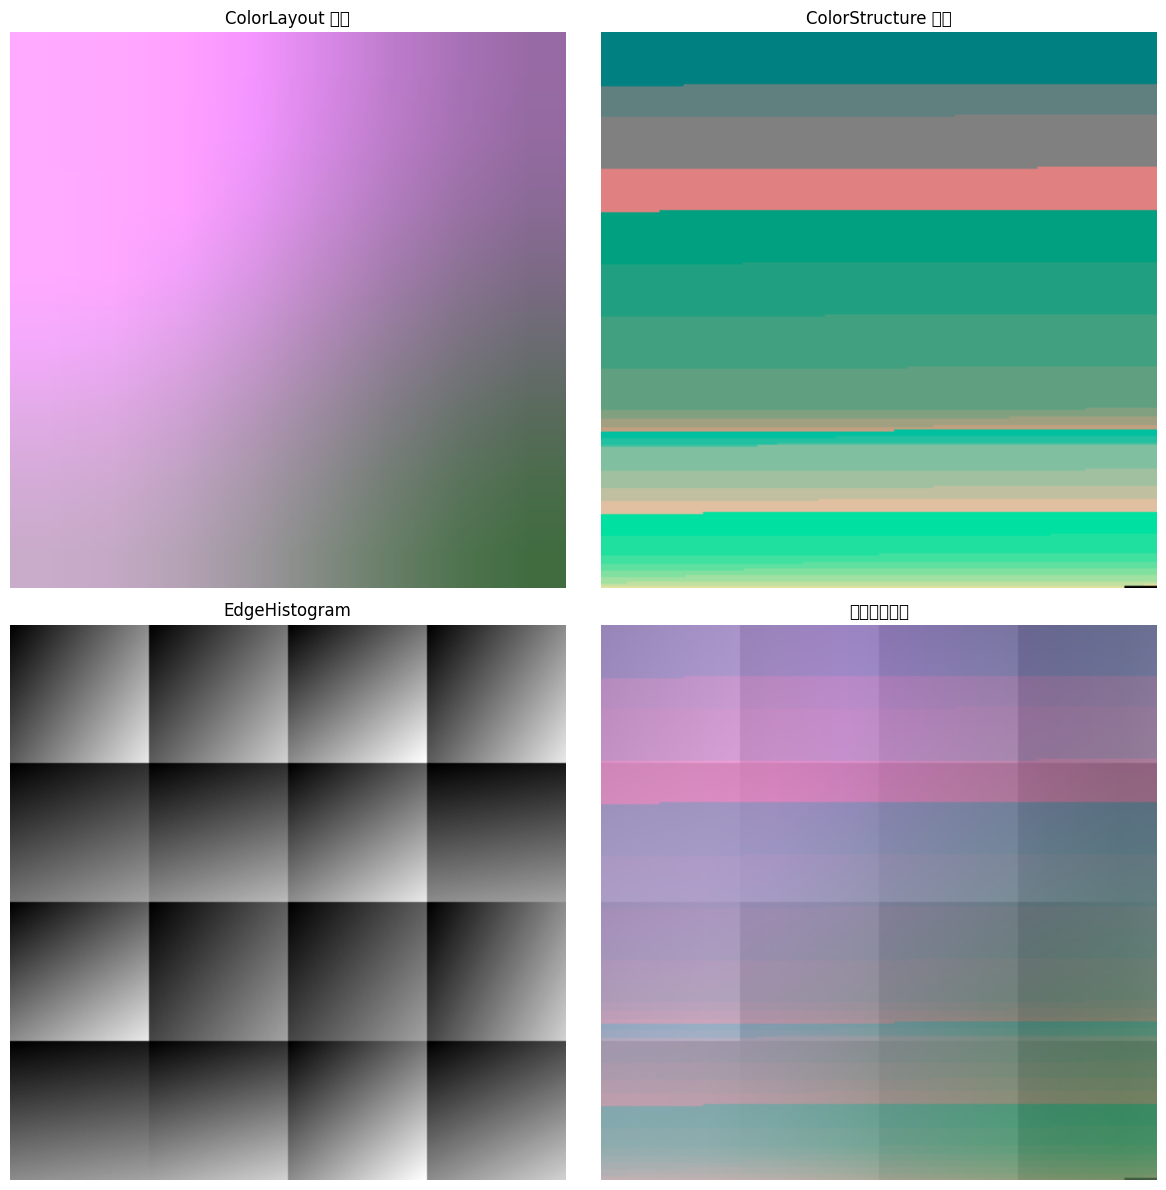


重建完成！
注意: 這是基於低維特徵的極度模糊重建
只能還原大致的顏色分布和基本結構


In [29]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def parse_features(feature_string):
    """解析特徵字串並分離各個描述符"""
    features = [float(x) for x in feature_string.strip().split()]
    
    # 確保有足夠的特徵
    if len(features) < 478:
        print(f"警告: 只有 {len(features)} 個特徵，預期 478 個")
    
    descriptors = {
        'color_structure': features[0:32],      # 0-31
        'color_layout': features[32:74],        # 32-73 (42個特徵)
        'region_shape': features[74:110],       # 74-109 (36個特徵)
        'homogeneous_texture': features[336:398],  # 336-397
        'edge_histogram': features[398:478]     # 398-477
    }
    
    return descriptors

def reconstruct_from_color_structure(cs, img_size=(128, 128)):
    """從 ColorStructure 重建顏色分布"""
    # ColorStructure 代表量化後的顏色直方圖
    img = np.zeros((img_size[0], img_size[1], 3), dtype=np.uint8)
    
    # 將32個bin映射回RGB空間
    colors = []
    for i in range(32):
        # 簡單的顏色映射 (假設HMMD顏色空間)
        hue = (i % 8) * 32
        sat = 128 + (i // 8) * 32
        val = 128 + (i // 16) * 32
        
        # 轉換為RGB (簡化版)
        r = int(np.clip(hue, 0, 255))
        g = int(np.clip(sat, 0, 255))
        b = int(np.clip(val, 0, 255))
        
        colors.append((r, g, b))
    
    # 根據直方圖值填充圖像
    total = sum(cs)
    if total > 0:
        y_pos = 0
        for i, count in enumerate(cs):
            if count > 0:
                pixels = int((count / total) * img_size[0] * img_size[1])
                for _ in range(pixels):
                    y = y_pos // img_size[1]
                    x = y_pos % img_size[1]
                    if y < img_size[0]:
                        img[y, x] = colors[i]
                    y_pos += 1
    
    return img

def reconstruct_from_color_layout(cl, img_size=(128, 128)):
    """從 ColorLayout 重建顏色布局"""
    # ColorLayout 使用 DCT 係數表示 8x8 縮圖的 YCbCr
    # 前6個Y, 3個Cb, 3個Cr (共12個主要係數)
    
    # 重建 8x8 縮圖
    thumb_size = 8
    y_coeffs = np.array(cl[0:6])
    cb_coeffs = np.array(cl[6:9]) if len(cl) > 6 else np.zeros(3)
    cr_coeffs = np.array(cl[9:12]) if len(cl) > 9 else np.zeros(3)
    
    # 創建簡化的 DCT 基底並重建
    y_img = create_simple_dct_image(y_coeffs, thumb_size)
    cb_img = create_simple_dct_image(cb_coeffs, thumb_size)
    cr_img = create_simple_dct_image(cr_coeffs, thumb_size)
    
    # 組合 YCbCr
    ycbcr = np.stack([y_img, cb_img, cr_img], axis=-1)
    
    # 轉換為 RGB
    rgb = ycbcr_to_rgb(ycbcr)
    
    # 放大到目標尺寸
    img = Image.fromarray(rgb.astype(np.uint8))
    img = img.resize(img_size, Image.BILINEAR)
    
    return np.array(img)

def create_simple_dct_image(coeffs, size):
    """使用簡化的DCT重建"""
    img = np.zeros((size, size))
    
    # 只使用前幾個係數
    if len(coeffs) > 0:
        # DC 分量
        img += coeffs[0]
        
        # 添加低頻分量
        if len(coeffs) > 1:
            for i in range(size):
                for j in range(size):
                    img[i, j] += coeffs[1] * np.cos(np.pi * i / size)
        
        if len(coeffs) > 2:
            for i in range(size):
                for j in range(size):
                    img[i, j] += coeffs[2] * np.cos(np.pi * j / size)
    
    # 歸一化到 0-255
    img = np.clip((img + 128), 0, 255)
    return img

def ycbcr_to_rgb(ycbcr):
    """YCbCr 轉 RGB"""
    y, cb, cr = ycbcr[:,:,0], ycbcr[:,:,1], ycbcr[:,:,2]
    
    r = y + 1.402 * (cr - 128)
    g = y - 0.344136 * (cb - 128) - 0.714136 * (cr - 128)
    b = y + 1.772 * (cb - 128)
    
    rgb = np.stack([r, g, b], axis=-1)
    return np.clip(rgb, 0, 255)

def reconstruct_from_edge_histogram(eh, img_size=(128, 128)):
    """從 EdgeHistogram 添加邊緣信息"""
    # EdgeHistogram 有 80 個 bin (5個邊緣類型 × 16個子區域)
    img = np.zeros((img_size[0], img_size[1]))
    
    # 將圖像分成 4x4 網格
    grid_h = img_size[0] // 4
    grid_w = img_size[1] // 4
    
    # 5種邊緣類型: 垂直、水平、45度、135度、非方向
    edge_types = ['vertical', 'horizontal', '45deg', '135deg', 'non-dir']
    
    for idx, val in enumerate(eh[:80]):  # 只使用前80個
        if val > 0:
            block = idx // 5
            edge_type = idx % 5
            
            row = block // 4
            col = block % 4
            
            y_start = row * grid_h
            y_end = (row + 1) * grid_h
            x_start = col * grid_w
            x_end = (col + 1) * grid_w
            
            # 根據邊緣類型添加模式
            strength = val * 20  # 縮放強度
            
            if edge_type == 0:  # 垂直
                img[y_start:y_end, x_start:x_end] += strength * np.linspace(0, 1, x_end-x_start)
            elif edge_type == 1:  # 水平
                img[y_start:y_end, x_start:x_end] += strength * np.linspace(0, 1, y_end-y_start).reshape(-1, 1)
    
    return np.clip(img, 0, 255).astype(np.uint8)

def reconstruct_image(feature_string, output_path='reconstructed.png', img_size=(256, 256)):
    """主重建函數"""
    print("解析特徵...")
    descriptors = parse_features(feature_string)
    
    print("從 ColorLayout 重建基本結構...")
    img_layout = reconstruct_from_color_layout(descriptors['color_layout'], img_size)
    
    print("從 ColorStructure 重建顏色分布...")
    img_color = reconstruct_from_color_structure(descriptors['color_structure'], img_size)
    
    print("從 EdgeHistogram 提取邊緣信息...")
    img_edges = reconstruct_from_edge_histogram(descriptors['edge_histogram'], img_size)
    
    # 組合多個重建結果
    # ColorLayout 提供主要結構，ColorStructure 提供顏色校正
    img_final = img_layout.astype(float) * 0.7 + img_color.astype(float) * 0.3
    
    # 添加邊緣增強
    img_edges_3ch = np.stack([img_edges]*3, axis=-1)
    img_final = img_final * 0.85 + img_edges_3ch * 0.15
    
    img_final = np.clip(img_final, 0, 255).astype(np.uint8)
    
    # 保存圖像
    Image.fromarray(img_final).save(output_path)
    print(f"圖像已保存至: {output_path}")
    
    # 顯示結果
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    
    axes[0, 0].imshow(img_layout)
    axes[0, 0].set_title('ColorLayout 重建')
    axes[0, 0].axis('off')
    
    axes[0, 1].imshow(img_color)
    axes[0, 1].set_title('ColorStructure 重建')
    axes[0, 1].axis('off')
    
    axes[1, 0].imshow(img_edges, cmap='gray')
    axes[1, 0].set_title('EdgeHistogram')
    axes[1, 0].axis('off')
    
    axes[1, 1].imshow(img_final)
    axes[1, 1].set_title('最終組合結果')
    axes[1, 1].axis('off')
    
    plt.tight_layout()
    plt.savefig('reconstruction_process.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    return img_final

# 主程式
if __name__ == "__main__":
    # 你的特徵向量
    # features = """0 0 0 0 6 0 0 0 13 14 12 18 0 0 0 0 0 0 0 4 0 0 0 3 3 1 1 2 2 2 5 23 56 28 34 13 16 22 16 22 16 19 16 15 15 1 11 13 9 15 7 12 15 14 15 14 6 3 15 4 11 15 4 14 6 9 7 15 9 13 15 11 15 15 4 11 13 7 11 0 -7 -1 -2 3 0 1 2 3 0 2 3 3 -3 0 -1 0 0 0 0 0 -1 0 0 0 -1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 201 138 205 226 222 199 196 223 191 191 183 187 203 199 181 187 153 167 153 175 149 172 167 150 145 135 138 159 166 126 133 125 205 226 223 197 196 224 180 184 177 183 193 192 167 179 135 154 138 174 133 147 164 130 140 131 120 130 134 111 101 108 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 3 4 2 3 6 0 4 0 2 5 0 4 0 1 0 0 0 0 2 2 0 2 3 0 3 5 4 0 0 0 2 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 0 2 0 0 0"""
    features = """25 0 0 15 25 0 0 20 25 25 25 20 4 4 2 0 3 3 1 0 12 8 6 6 11 9 4 3 3 3 2 1 25 19 49 20 24 20 15 19 13 14 19 16 10 15 7 9 7 15 13 10 13 7 11 9 7 8 12 7 6 8 9 4 7 6 2 8 4 4 1 4 4 7 4 3 2 2 3 0 4 -8 -7 9 -1 0 0 2 1 0 0 2 -1 1 1 2 0 0 0 1 -1 0 0 1 -1 0 0 1 -1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 -1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 143 99 201 208 189 174 193 200 203 192 201 187 184 172 179 190 167 195 148 166 147 154 142 164 138 125 150 130 92 112 85 94 203 205 185 173 195 197 189 185 199 182 173 160 164 185 150 184 134 164 132 128 137 150 132 122 138 110 72 103 61 79 6 4 3 5 2 5 4 4 4 3 5 6 3 3 3 6 4 4 4 4 2 5 6 4 5 2 6 3 3 4 4 6 5 5 3 1 6 3 4 6 4 6 4 5 3 4 3 5 4 4 4 3 5 3 6 6 3 2 3 3 1 6 2 2 2 2 7 0 2 2 5 6 4 5 3 3 6 1 3 3"""
    # 重建圖像
    reconstructed = reconstruct_image(features, 'ancestor_dino_reconstructed.png', img_size=(256, 256))
    
    print("\n重建完成！")
    print("注意: 這是基於低維特徵的極度模糊重建")
    print("只能還原大致的顏色分布和基本結構")